In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression, f_regression

1. Исходные данные

In [2]:
# Фиксация генератора случайных чисел
random_seed = 2022  # dataset_0: 2022
np.random.seed(random_seed)

# Число признаков
N_feat = 5

# Число строк (число измерений)
N_rows = 100

# Точные значения коэффициентов регрессии
z_complex_acc = (0.040 + 0.02j, 0.035 + 0.015j, 0.03 + 0.02j, 0.020 + 0.012j, 0.016 + 0.01j)
# z_complex_acc = (0.040 + 0.0001j, 0.035 + 0.0001j, 0.03 + 0.0001j, 0.020 + 0.0001j, 0.016 + 0.0001j)
# z_complex_acc = (0.040, 0.035, 0.03, 0.020, 0.016)

# Отн. погрешность коэффициентов регрессии
q = 0.

# Начальные значения матрицы A
A_0 = [400 + 150j, 200 + 100j, 450 + 200j, 600 + 250j, 200 + 100j]
# A_0 = [400 + 0.0001j, 200 + 0.0001j, 450 + 0.0001j, 600 + 0.0001j, 200 + 0.0001j]
# A_0 = [400, 200, 450, 600, 200]

# Коэффициенты увеличения значений элементов матрицы A
k_values = [1.5 / N_rows,
            1.5 / N_rows,
            1.5 / N_rows,
            1.5 / N_rows,
            1.5 / N_rows]

# Отн. погрешности значений элементов матрицы A и вектора b
k_A = 0.2 # dataset_complex_1: 0.2  dataset_complex_2: 0.0001
k_b = 0.2 # dataset_complex_1: 0.2  dataset_complex_2: 0.0001

2. Запись z_complex_acc в файл

In [3]:
df_z_complex_acc = pd.DataFrame(z_complex_acc)
file_path = 'C:\Datasets/dataset_z_complex_acc.xlsx'
df_z_complex_acc.to_excel(file_path, index=False, float_format='%.20f')

3. Формирование вектора z_complex, матрицы A и вектора b

In [4]:
# Генерация вектора z_phase
z_complex = z_complex_acc * np.random.uniform(1, 1 + q, N_feat)
z_complex

array([0.04 +0.02j , 0.035+0.015j, 0.03 +0.02j , 0.02 +0.012j,
       0.016+0.01j ])

In [5]:
# Создание пустой матрицы A
A = np.zeros((N_rows, N_feat)).astype(complex)
# Заполнение первой строки матрицы A
A[0] = A_0
# Заполнение остальных строк матрицы A
for i in range(1, N_rows):
    A[i] = A[i-1]
    for j in range(N_feat):
        A[i, j:j+1] *= np.random.uniform(1, 1 + k_values[j])

b = np.sum(A * z_complex, axis=1)

# Генерация названий столбцов
column_names_0 = []

for i in range(1, N_feat + 1):
    column_names_0.append(f"A_{i}")

df_complex_0 = pd.DataFrame(A, columns=column_names_0)
df_complex_0["b"] = b
file_path = 'C:\Datasets/dataset_complex_0.xlsx'
df_complex_0.to_excel(file_path, index=False, float_format='%.20f')
df_complex_0

,A_1,A_2,A_3,A_4,A_5,b
0,400.000000+150.000000j,200.000000+100.000000j,450.000000+200.000000j,600.000000+250.000000j,200.000000+100.000000j,39.200000+51.300000j
1,402.921928+151.095723j,202.692972+101.346486j,454.370301+201.942356j,608.072668+253.363612j,202.163405+101.081702j,39.606169+51.838551j
2,407.946486+152.979932j,205.209105+102.604553j,460.051609+204.467382j,616.801956+257.000815j,203.279482+101.639741j,40.101815+52.483147j
3,410.974495+154.115436j,206.254162+103.127081j,464.326150+206.367178j,625.846089+260.769204j,203.573525+101.786762j,40.458102+52.954767j
4,415.562242+155.835841j,207.159100+103.579550j,466.406392+207.291730j,632.910077+263.712532j,203.630516+101.815258j,40.782592+53.358750j
...,...,...,...,...,...,...
95,813.544949+305.079356j,416.805300+208.402650j,922.461153+409.982735j,1183.940560+493.308567j,434.083904+217.041952j,79.910568+104.655919j
96,819.670740+307.376527j,417.792649+208.896325j,929.962976+413.316878j,1185.061608+493.775670j,439.799087+219.899544j,80.374863+105.278139j
97,820.968624+307.863234j,421.856504+210.928252j,937.342687+416.596750j,1191.313698+496.380707j,444.891074+222.445537j,80.834387+105.920412j
98,828.110129+310.541298j,426.787797+213.393898j,947.095035+420.931127j,1204.042158+501.684233j,446.936050+223.468025j,81.621401+106.951332j


In [6]:
df_0_real = df_complex_0.applymap(lambda x: x.real)
df_0_imag = df_complex_0.applymap(lambda x: x.imag)
df_0_modul = df_complex_0.applymap(lambda x: abs(x))


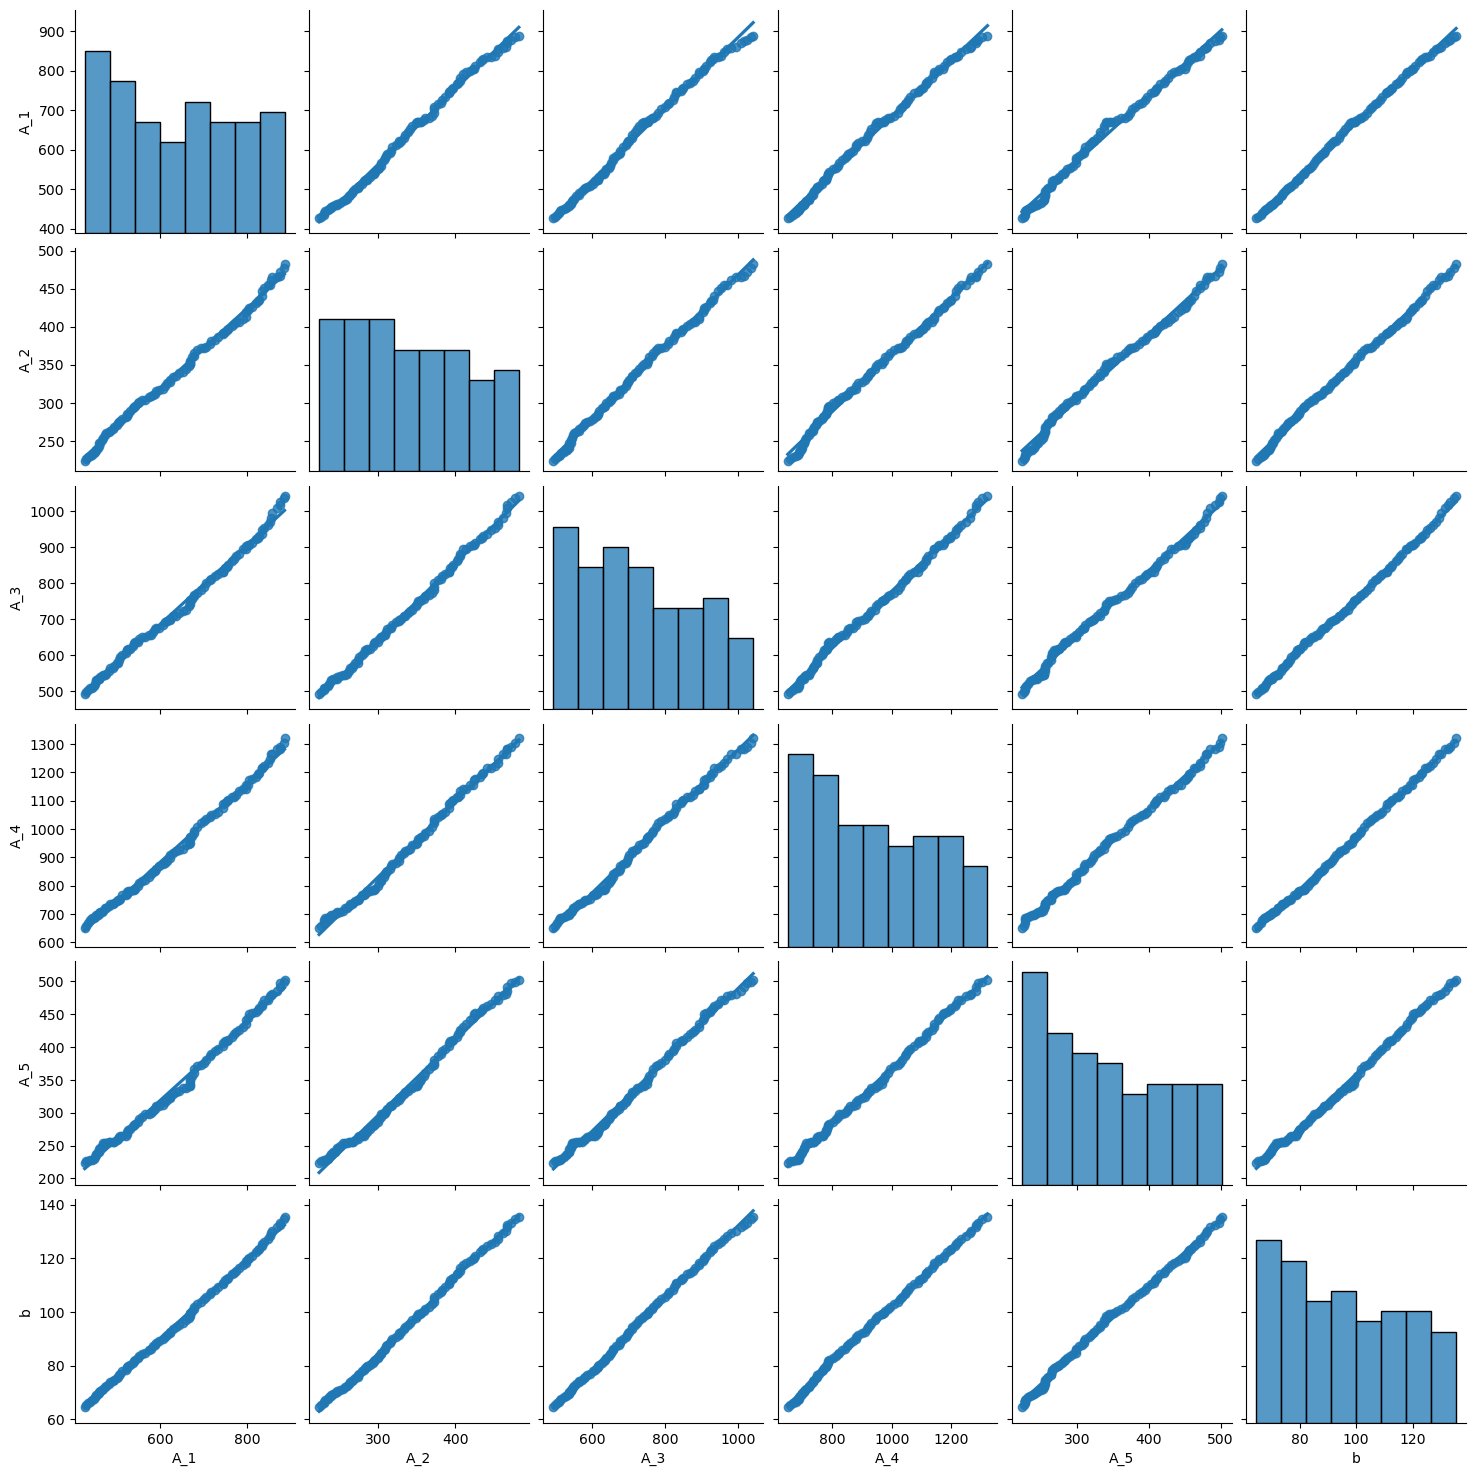

In [7]:
sns.pairplot(df_0_modul, kind="reg")
plt.show()

4. Генерация матрицы A_h и вектора b_d, заданных с погрешностями k_A и k_b

In [8]:
# Фиксация генератора случайных чисел для генерации матрицы A_h и вектора b_d
random_seed = 1986  # dataset_complex_1: 1986  dataset_complex_2: 2017
np.random.seed(random_seed)

In [9]:
random_values_1 = np.random.uniform(1 - k_A, 1 + k_A, size=A.shape)
random_values_2 = np.random.uniform(1 - k_b, 1 + k_b, size=b.shape)
A_h = A * random_values_1
b_d = b * random_values_2
# Генерация названий столбцов
column_names = []

for i in range(1, N_feat + 1):
    column_names.append(f"A_h_{i}")

df_complex = pd.DataFrame(A_h, columns=column_names)
df_complex["b_d"] = b_d
file_path = 'C:\Datasets/dataset_complex_1.xlsx'
df_complex.to_excel(file_path, index=False, float_format='%.20f')
df_complex

,A_h_1,A_h_2,A_h_3,A_h_4,A_h_5,b_d
0,411.020052+154.132519j,166.187063+83.093532j,469.526303+208.678357j,695.399462+289.749776j,203.592542+101.796271j,40.365917+52.825804j
1,435.594381+163.347893j,193.461282+96.730641j,481.933944+214.192864j,654.298746+272.624477j,219.843382+109.921691j,45.433008+59.465012j
2,438.980812+164.617805j,230.392713+115.196356j,420.257051+186.780911j,680.376588+283.490245j,187.632928+93.816464j,34.716494+45.435122j
3,400.766964+150.287612j,210.601673+105.300837j,451.856218+200.824986j,645.277058+268.865441j,235.510716+117.755358j,47.275564+61.878001j
4,371.435720+139.288395j,205.100165+102.550082j,533.338487+237.039328j,576.467513+240.194797j,200.725943+100.362972j,44.702238+58.487099j
...,...,...,...,...,...,...
95,806.399265+302.399724j,342.300909+171.150455j,765.824582+340.366481j,1379.294027+574.705845j,441.442892+220.721446j,79.803011+104.515055j
96,866.137217+324.801456j,351.696868+175.848434j,946.282398+420.569955j,1222.122015+509.217506j,428.621144+214.310572j,69.781498+91.402536j
97,854.883004+320.581126j,400.840360+200.420180j,1058.115746+470.273665j,1152.113075+480.047115j,455.522800+227.761400j,65.811312+86.235099j
98,906.488103+339.933039j,448.367782+224.183891j,1031.825618+458.589164j,1409.386848+587.244520j,369.931218+184.965609j,78.622187+103.021358j


In [10]:
df_real = df_complex.applymap(lambda x: x.real)
df_imag = df_complex.applymap(lambda x: x.imag)
df_modul = df_complex.applymap(lambda x: abs(x))


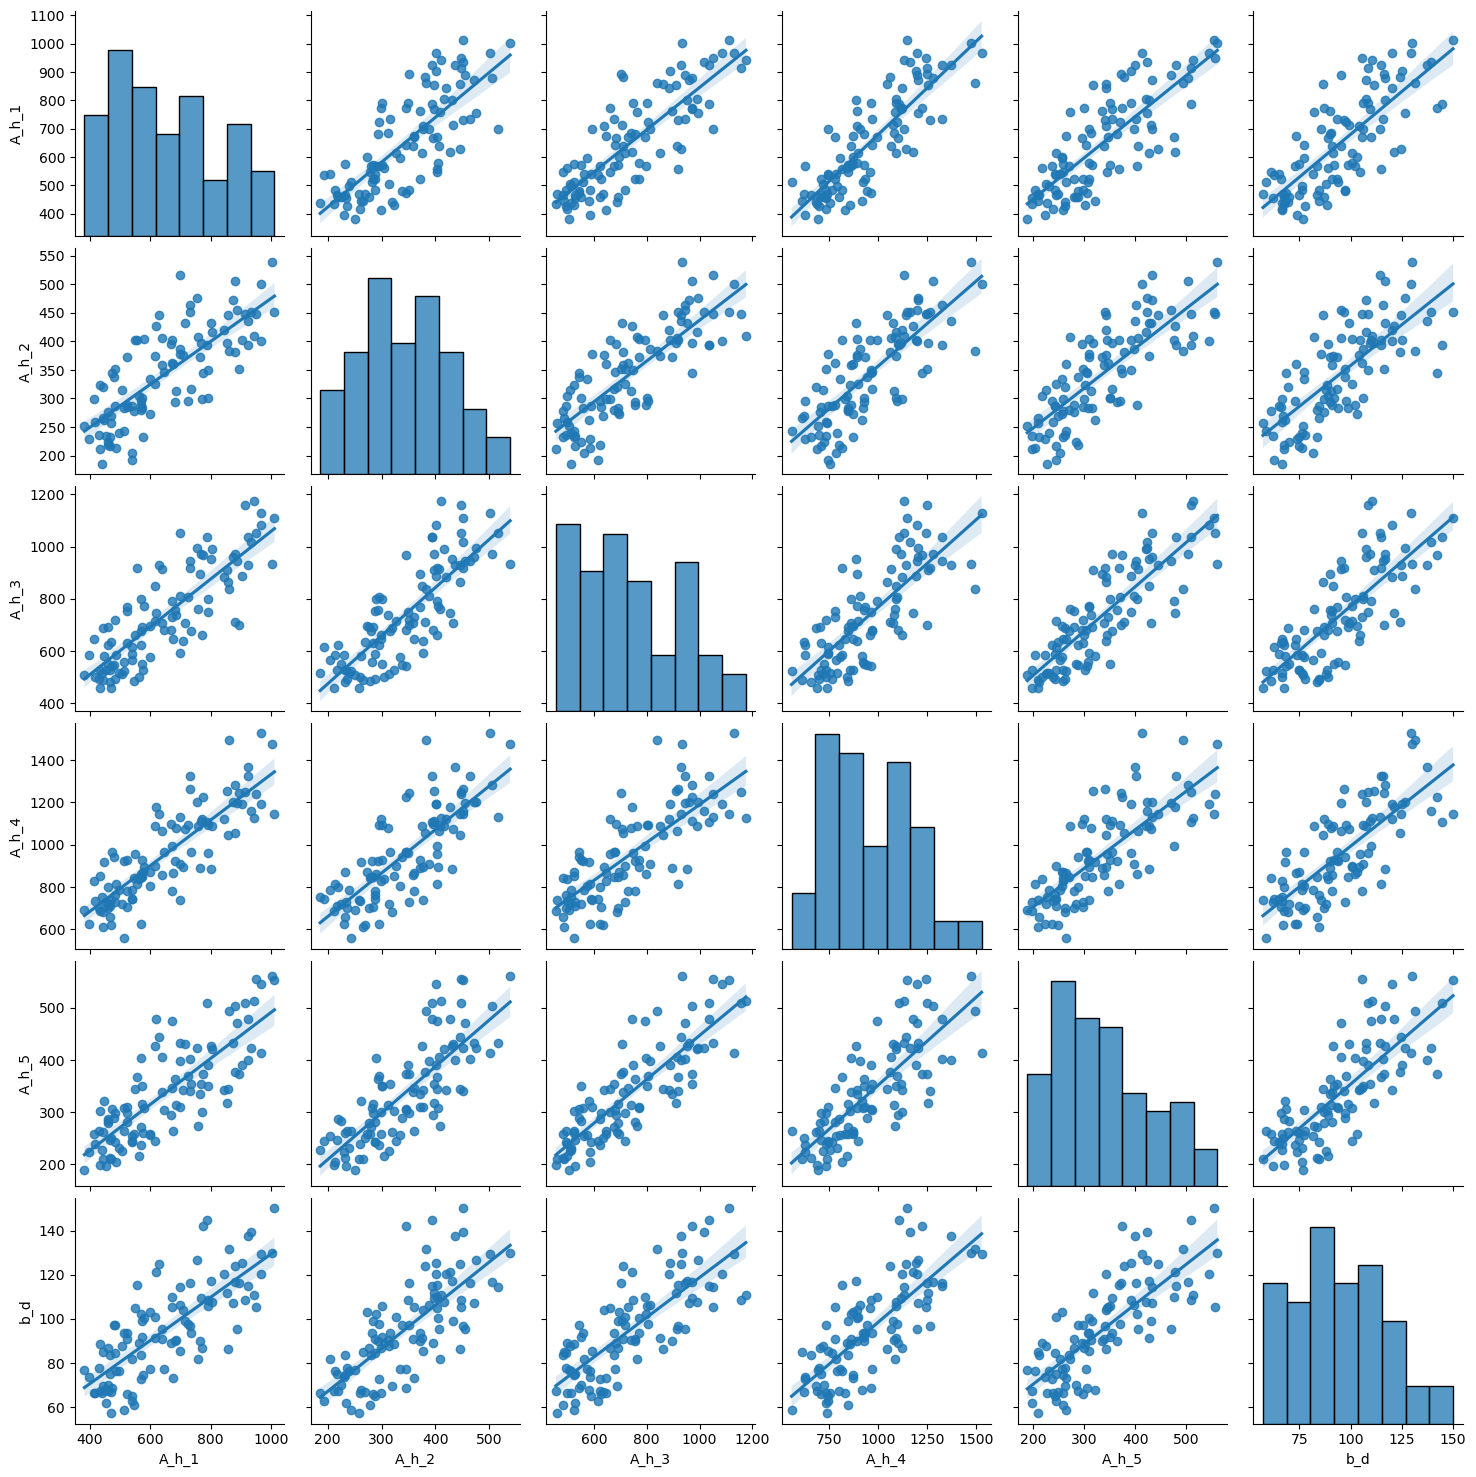

In [11]:
sns.pairplot(df_modul, kind="reg")
plt.show()

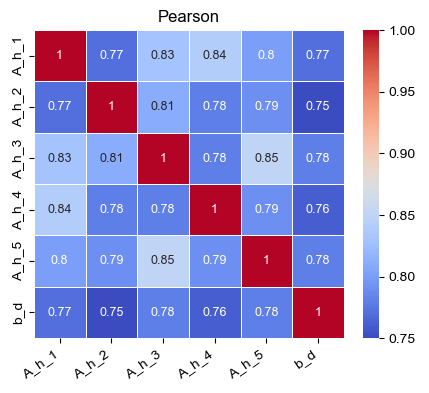

In [12]:
plt.figure(figsize=(5, 4))
sns.heatmap(df_modul.corr(method='pearson').round(2), annot=True, annot_kws={"fontsize": 9}, cmap='coolwarm', linewidth=.5)
sns.set(rc={"xtick.labelsize":10, "ytick.labelsize":10})
plt.xticks(rotation=35, ha='right')
plt.title('Pearson')
plt.show()

5. Анализ значимости признаков

In [13]:
def vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]
        X, y = df[X], df[feature]
        R2 = LinearRegression().fit(X, y).score(X, y)                
        tolerance[feature] = 1 - R2
        vif[feature] = 1 / (tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
vif(df = df_modul, features = df_complex.columns)

,VIF,Tolerance
A_h_1,4.834825,0.206833
A_h_2,3.752462,0.266492
A_h_3,5.188293,0.192742
A_h_4,4.354790,0.229632
A_h_5,4.604013,0.217202
b_d,3.372809,0.296489


MI - показатель значимости любого (линейного и нелинейного) влияния признака (чем MI больше, тем больше признак влияет на целевую переменную);            
corr - коэф. корреляции Пирсона;                                                                                                                            
f - показатель значимости линейного влияния признака (чем f больше, тем больше признак влияет на целевую переменную);                                       
p - вероятность того, что целевая переменная не зависит от признака (показывает насколько верна гипотеза H0: "признак не влияет на целевую переменную")

In [14]:
X = df_modul.copy()
y = X.pop('b_d')
mi_full = mutual_info_regression(X, y, random_state=2023)
f_full = f_regression(X, y)
f_p_full = pd.DataFrame({'MI':mi_full, 'corr':X.corrwith(y), 'f':f_full[0], 'p':f_full[1]}, index=X.columns)
f_p_full.round(3)

,MI,corr,f,p
A_h_1,0.457,0.767,140.464,0.0
A_h_2,0.420,0.746,123.168,0.0
A_h_3,0.559,0.784,156.020,0.0
A_h_4,0.487,0.763,136.474,0.0
A_h_5,0.498,0.784,155.848,0.0
